<a href="https://colab.research.google.com/github/reshmi56/ML-Projects/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [14]:
#download mnist data and split into train,test
(x_train,y_train),(x_test,y_test)=mnist.load_data()

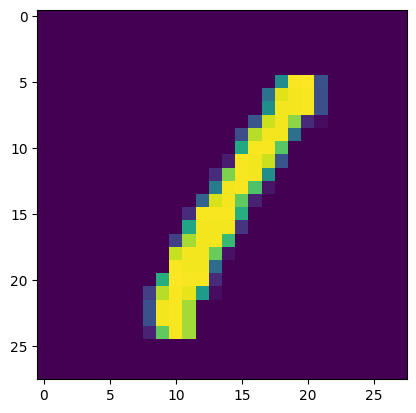

In [15]:
plt.imshow(x_train[3])

In [16]:
#check image shape
x_train[0].shape

(28, 28)

In [17]:
#reshape data to fit model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [18]:
x_train[0].shape

(28, 28, 1)

In [19]:
y_train[3]

1

In [20]:
#one-hot encode target column
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
#create sequential model
model=Sequential()
#add layers to the model
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))


In [23]:
#compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
#train model
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 148s 78ms/step - loss: 0.2107 - accuracy: 0.9532 - val_loss: 0.0845 - val_accuracy: 0.9745
Epoch 2/3
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0695 - accuracy: 0.9788 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 3/3
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0463 - accuracy: 0.9853 - val_loss: 0.0929 - val_accuracy: 0.9745


In [25]:
#show predictions for test set
model.predict(x_test[:4])

1/1 [==============================] - 0s 106ms/step


array([[2.57969418e-07, 9.96464912e-16, 1.92304537e-08, 1.17415645e-07,
        1.94691962e-12, 3.86907737e-12, 2.93758209e-13, 9.99998689e-01,
        8.28312636e-07, 1.73810321e-07],
       [7.21885556e-07, 7.34707783e-06, 9.99990582e-01, 8.33215719e-09,
        3.63310944e-11, 1.48772973e-11, 1.33129595e-06, 8.16618257e-13,
        1.61264655e-08, 2.86749791e-12],
       [3.84388272e-08, 9.99014378e-01, 4.94903134e-07, 1.20360119e-11,
        9.78529570e-04, 1.32170598e-07, 1.87253635e-09, 4.92261236e-08,
        6.28448015e-06, 1.23801684e-07],
       [9.99991298e-01, 5.28894810e-12, 1.70895742e-08, 6.72086388e-12,
        2.72365352e-09, 2.52881605e-10, 8.57764280e-06, 4.20755999e-11,
        1.13685154e-07, 3.75474007e-09]], dtype=float32)

In [26]:
#show actual results for first 3 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)